In [ ]:
'''En este informe vamos a analizar el mercado laboral de Castellón, Comunidad Valenciana y España conjuntamente. Através de estos cuatro indicadores:

I. TASA DE PARO (Por lugar geográfico y nivel educativo)

II. TASA DE ACTIVIDAD (Por lugar geográfico y nivel de edad)

III. AFILIACIONES SEGURIDAD SOCIAL (tasa de variación anual por grupo de edad)

IV. EVOLUCIÓN HORAS TRABAJADAS (tasa de variación anual)

Los datos de este estudio provienen de https://serviciosede.mineco.gob.es/Indeco/BDSICE/Busquedas/busquedas_new.aspx'''

<ipython-input-16-c03b1a7b4485>:66: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")  # Estilo de fuente más grande


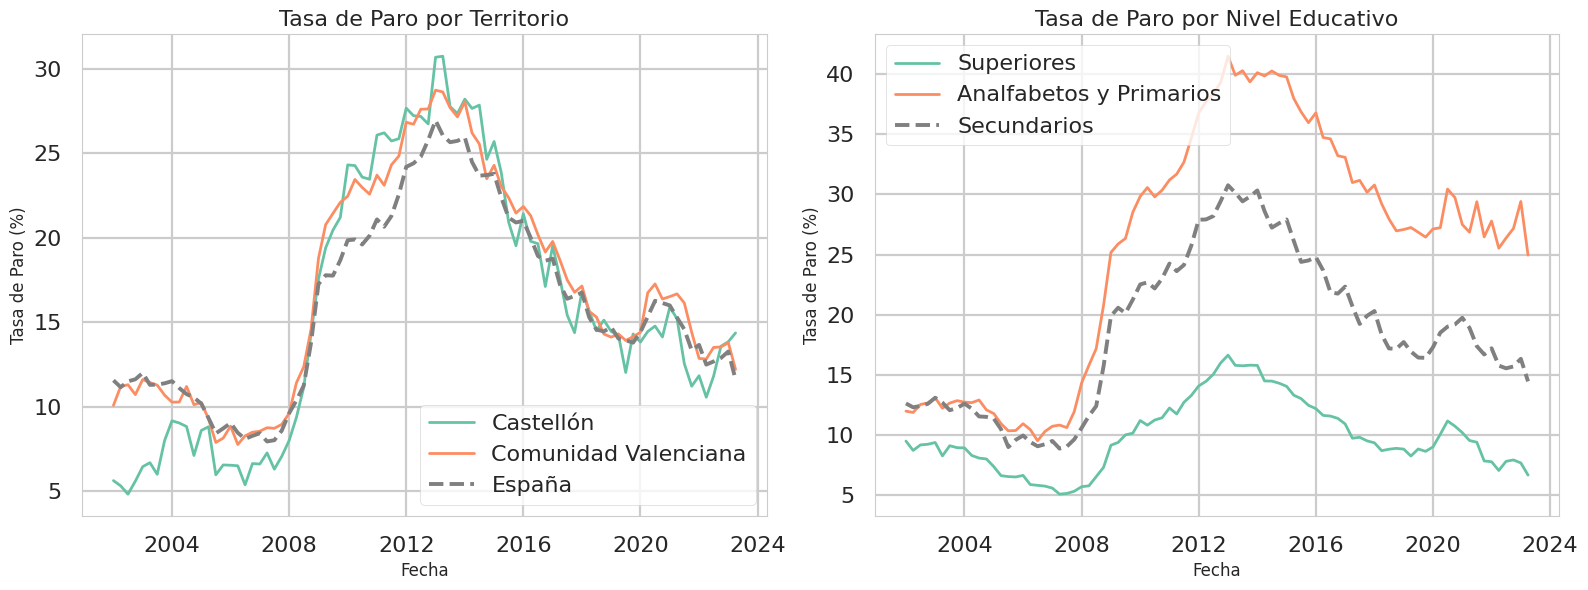

In [ ]:
# Importamos librerias
import pandas as pd  # Para el manejo de datos y el análisis
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns  # Para mejorar la estética de los gráficos

# 1. Cargar los datos del archivo "TasaParo.xlsx"
data = pd.read_excel("TasaParo.xlsx")

# 2. Eliminar la primera fila que contiene los códigos de las variables
data.drop(0, inplace=True)

# 3. Transformar y configurar adecuadamente la variable de fecha
data['Fecha'] = data['SERIES'].astype('str')
data['Fecha'] = data['Fecha'].str[:4] + "Q" + data['Fecha'].str[-1:]
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index("Fecha", inplace=True)
data.drop(columns="SERIES", inplace=True)

# 4. Renombrar las variables para mayor claridad y calcular las tasas de paro
data.rename(columns={
    "ACTIVOS. CASTELLÓN": "Activos Castellón",
    "ACTIVOS. COMUNIDAD VALENCIANA": "Activos Comunidad Valenciana",
    "PARADOS EN CASTELLÓN": "Parados Castellón",
    "PARADOS EN COMUNIDAD VALENCIANA": "Parados Comunidad Valenciana",
    "TASA DE PARO. TOTAL": "Tasa de Paro España"}, inplace=True)

data['Tasa de Paro Castellón'] = (data['Parados Castellón'] / data['Activos Castellón']) * 100
data['Tasa de Paro Comunidad Valenciana'] = (data['Parados Comunidad Valenciana'] / data['Activos Comunidad Valenciana']) * 100

data.rename(columns={
    "TASA DE PARO. NIVEL DE ESTUDIOS: SUPERIORES": "Tasa de Paro Superiores",
    "TASA DE PARO. NIVEL DE ESTUDIOS: ANALFABETOS Y PRIMARIOS": "Tasa de Paro Analfabetos y Primarios",
    "TASA DE PARO. NIVEL DE ESTUDIOS: SECUNDARIOS": "Tasa de Paro Secundarios"}, inplace=True)

# 5. Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# 6. Crear gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Tasa de paro por territorio
ax1.plot(data.index, data['Tasa de Paro Castellón'], label='Castellón', linewidth=2)
ax1.plot(data.index, data['Tasa de Paro Comunidad Valenciana'], label='Comunidad Valenciana', linewidth=2)
ax1.plot(data.index, data['Tasa de Paro España'], label='España', linestyle='--', color='gray')
ax1.set_title('Tasa de Paro por Territorio', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Tasa de Paro (%)', fontsize=12)
ax1.legend()
ax1.grid(True)

# Gráfico 2: Tasa de paro por nivel educativo
ax2.plot(data.index, data['Tasa de Paro Superiores'], label='Superiores', linewidth=2)
ax2.plot(data.index, data['Tasa de Paro Analfabetos y Primarios'], label='Analfabetos y Primarios', linewidth=2)
ax2.plot(data.index, data['Tasa de Paro Secundarios'], label='Secundarios', linestyle='--', color='gray')
ax2.set_title('Tasa de Paro por Nivel Educativo', fontsize=16)
ax2.set_xlabel('Fecha', fontsize=12)
ax2.set_ylabel('Tasa de Paro (%)', fontsize=12)
ax2.legend()
ax2.grid(True)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Personalizar la estética
sns.set_palette("Set2")  # Cambiar la paleta de colores
plt.style.use("seaborn-poster")  # Estilo de fuente más grande

# Mostrar los gráficos
plt.show()

<ipython-input-11-c7d5e2854994>:75: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")  # Estilo de fuente más grande


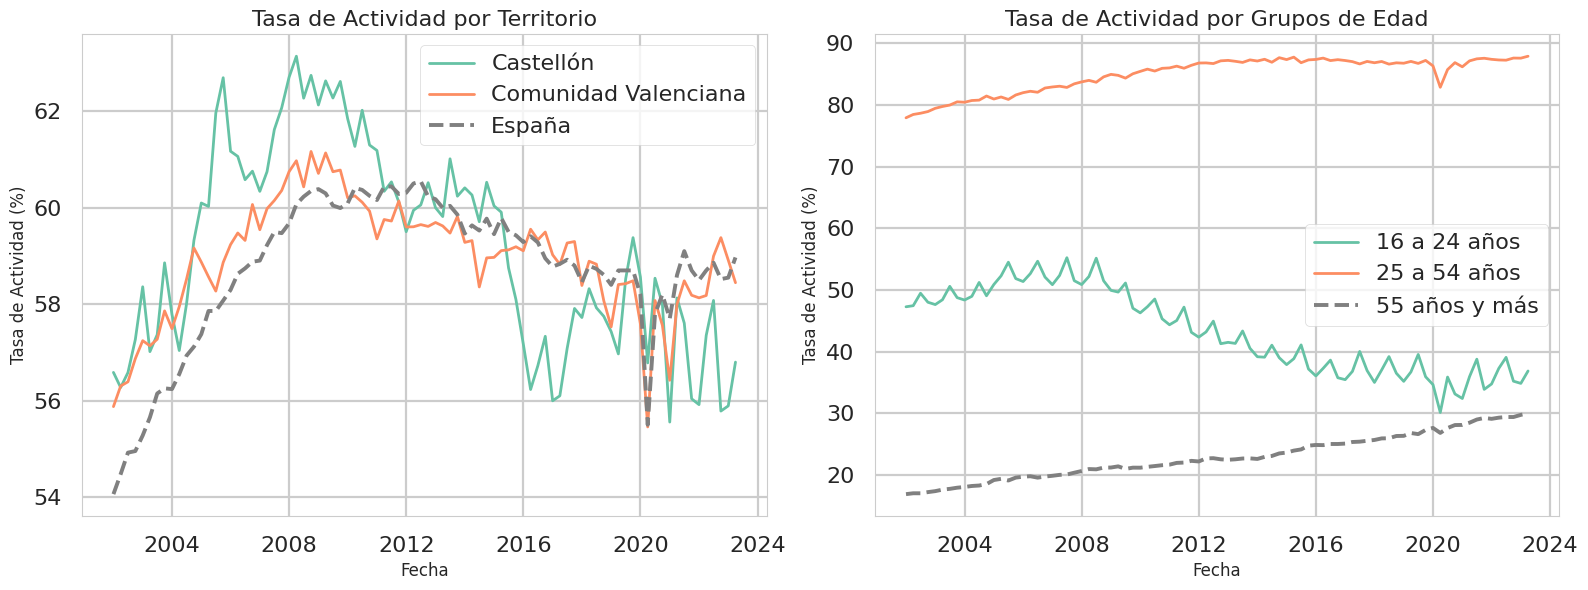

In [11]:
# Importamos librerias
import pandas as pd  # Para el manejo de datos y el análisis
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns  # Para mejorar la estética de los gráficos

# 1. Cargar los datos del archivo "TasaActividad.xlsx"
data = pd.read_excel("TasaActividad.xlsx")

# 2. Eliminar la primera fila que contiene los códigos de las variables
data.drop(0, inplace=True)

# 3. Transformar y configurar adecuadamente la variable de fecha
data['Fecha'] = data['SERIES'].astype('str')
data['Fecha'] = data['Fecha'].str[:4] + "Q" + data['Fecha'].str[-1:]
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index("Fecha", inplace=True)
data.drop(columns="SERIES", inplace=True)

# 4. Renombrar las variables para mayor claridad y calcular las tasas de actividad
data.rename(columns={
    "ACTIVOS. CASTELLÓN": "Activos Castellón",
    "ACTIVOS. COMUNIDAD VALENCIANA": "Activos Comunidad Valenciana",
    "POBLACION MAYOR DE 16 AÑOS. CASTELLÓN": "Población Castellón",
    "POBLACION MAYOR DE 16 AÑOS. COMUNIDAD VALENCIANA": "Población Comunidad Valenciana",
    "TASA DE ACTIVIDAD TOTAL": "Tasa de Actividad España"
}, inplace=True)

data['Tasa de Actividad Castellón'] = (data['Activos Castellón'] / data['Población Castellón']) * 100
data['Tasa de Actividad Comunidad Valenciana'] = (data['Activos Comunidad Valenciana'] / data['Población Comunidad Valenciana']) * 100

data.rename(columns={
    "ACTIVOS DE 16 A 24 AÑOS. TOTAL": "Activos 16 a 24 años",
    "POBLACIÓN DE 16 A 24 AÑOS. TOTAL": "Población 16 a 24 años",
    "ACTIVOS DE 25 A 54 AÑOS. TOTAL": "Activos 25 a 54 años",
    "POBLACIÓN DE 25 A 54 AÑOS. TOTAL": "Población 25 a 54 años",
    "ACTIVOS DE 55 AÑOS Y MÁS. TOTAL": "Activos 55 años y más",
    "POBLACIÓN DE 55 AÑOS Y MAS. TOTAL": "Población 55 años y más"
}, inplace=True)

data['Tasa de Actividad 16 a 24 años'] = (data['Activos 16 a 24 años'] / data['Población 16 a 24 años']) * 100
data['Tasa de Actividad 25 a 54 años'] = (data['Activos 25 a 54 años'] / data['Población 25 a 54 años']) * 100
data['Tasa de Actividad 55 años y más'] = (data['Activos 55 años y más'] / data['Población 55 años y más']) * 100

# 5. Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# 6. Crear gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Tasa de actividad por territorio
ax1.plot(data.index, data['Tasa de Actividad Castellón'], label='Castellón', linewidth=2)
ax1.plot(data.index, data['Tasa de Actividad Comunidad Valenciana'], label='Comunidad Valenciana', linewidth=2)
ax1.plot(data.index, data['Tasa de Actividad España'], label='España', linestyle='--', color='gray')
ax1.set_title('Tasa de Actividad por Territorio', fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Tasa de Actividad (%)', fontsize=12)
ax1.legend()
ax1.grid(True)

# Gráfico 2: Tasa de actividad por grupo de edad
ax2.plot(data.index, data['Tasa de Actividad 16 a 24 años'], label='16 a 24 años', linewidth=2)
ax2.plot(data.index, data['Tasa de Actividad 25 a 54 años'], label='25 a 54 años', linewidth=2)
ax2.plot(data.index, data['Tasa de Actividad 55 años y más'], label='55 años y más', linestyle='--', color='gray')
ax2.set_title('Tasa de Actividad por Grupos de Edad', fontsize=16)
ax2.set_xlabel('Fecha', fontsize=12)
ax2.set_ylabel('Tasa de Actividad (%)', fontsize=12)
ax2.legend()
ax2.grid(True)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Personalizar la estética
sns.set_palette("Set2")  # Cambiar la paleta de colores
plt.style.use("seaborn-poster")  # Estilo de fuente más grande

# Mostrar los gráficos
plt.show()

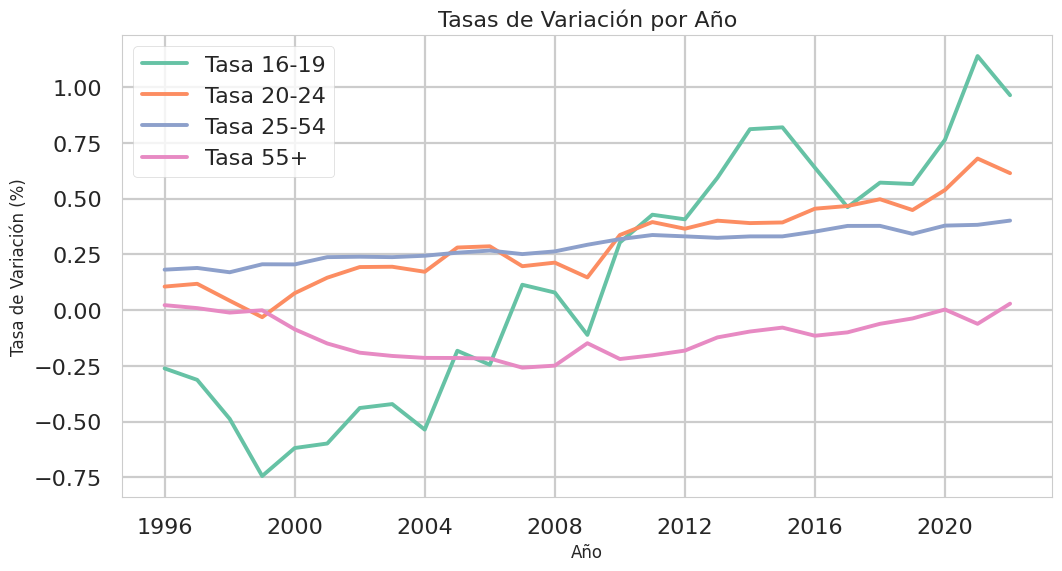

In [12]:
# Importamos librerias
import pandas as pd  # Para el manejo de datos y el análisis
import matplotlib.pyplot as plt  # Para crear gráficos

# 1. Importamos los datos
data = pd.read_excel("Afiliaciones.xlsx")

# 2. Eliminamos la primera fila que contiene los códigos de las variables
data.drop(0, inplace=True)

# 3. Transformar y configurar adecuadamente la variable de fecha
data['Fecha'] = data['SERIES'].astype('str')
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index("Fecha", inplace=True)
data.drop(columns="SERIES", inplace=True)

# 4. Renombrar las variables y calcular la tasa de variación interanual
data.rename(columns={
    "TRABAJADORES EN ALTA LABORAL AFILIADOS A LA SEGURIDAD SOCIAL. 16-19 AÑOS.": "Afiliados 16-19",
    "TRABAJADORES EN ALTA LABORAL AFILIADOS A LA SEGURIDAD SOCIAL. 20-24 AÑOS.": "Afiliados 20-24",
    "TRABAJADORES EN ALTA LABORAL AFILIADOS A LA SEGURIDAD SOCIAL. 25-54 AÑOS.": "Afiliados 25-54",
    "TRABAJADORES EN ALTA LABORAL AFILIADOS A LA SEGURIDAD SOCIAL. 55 AÑOS Y MÁS.": "Afiliados 55+"
}, inplace=True)

data['Tasa de Variación 16-19'] = ((data['Afiliados 16-19'] - data['Afiliados 16-19'].shift(1)) / data['Afiliados 16-19'].shift(1)) * 100
data['Tasa de Variación 20-24'] = ((data['Afiliados 20-24'] - data['Afiliados 20-24'].shift(1)) / data['Afiliados 20-24'].shift(1)) * 100
data['Tasa de Variación 25-54'] = ((data['Afiliados 25-54'] - data['Afiliados 25-54'].shift(1)) / data['Afiliados 25-54'].shift(1)) * 100
data['Tasa de Variación 55+'] = ((data['Afiliados 55+'] - data['Afiliados 55+'].shift(1)) / data['Afiliados 55+'].shift(1)) * 100

# 5. Representamos gráficamente los datos
data = data[1:]
plt.figure(figsize=(12, 6))  # Tamaño de la figura
plt.plot(data.index, data['Tasa de Variación 16-19'], label='Tasa 16-19')
plt.plot(data.index, data['Tasa de Variación 20-24'], label='Tasa 20-24')
plt.plot(data.index, data['Tasa de Variación 25-54'], label='Tasa 25-54')
plt.plot(data.index, data['Tasa de Variación 55+'], label='Tasa 55+')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa de Variación (%)', fontsize=12)
plt.title('Tasa de Variación Afiliaciones por Año', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

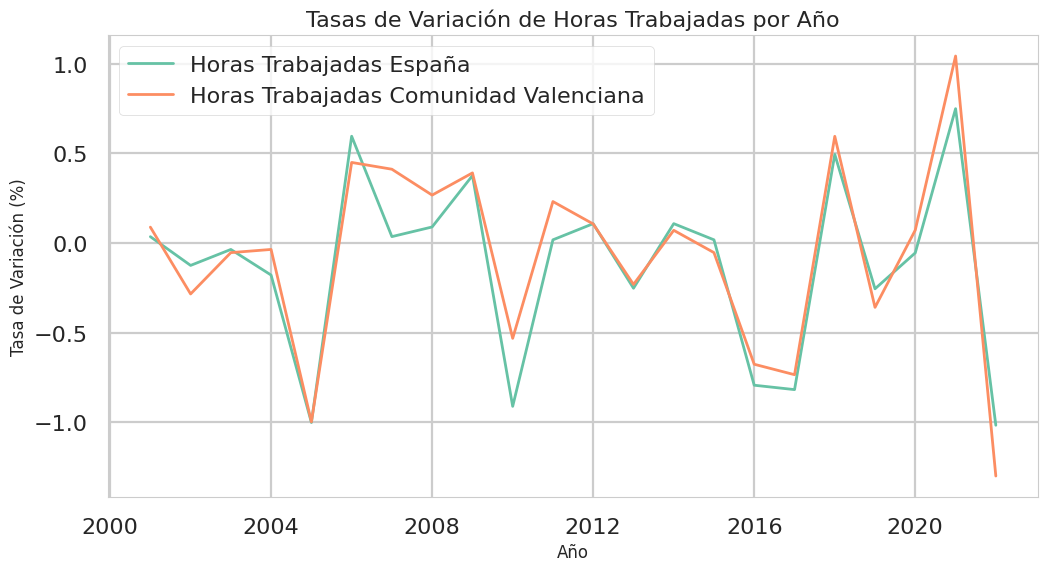

In [14]:
# Importamos librerías
import pandas as pd  # Para el manejo de datos y el análisis
import matplotlib.pyplot as plt  # Para crear gráficos

# 1. Importamos los datos
data = pd.read_excel("Horas.xlsx")

# 2. Eliminamos la primera fila que contiene los códigos de las variables
data.drop(0, inplace=True)

# 3. Transformamos y configuramos adecuadamente la variable de fecha
data['Fecha'] = data['SERIES'].astype('str')
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index("Fecha", inplace=True)
data.drop(columns="SERIES", inplace=True)

# 4. Renombramos variables
data.rename(columns={
    "HORAS EFECTIVAS TRABAJADAS AL MES. TOTAL SECTORES (ETCL)": "Horas Trabajadas España",
    "HORAS EFECTIVAS TRABAJADAS AL MES. COMUNIDAD VALENCIANA (ETCL)": "Horas Trabajadas Comunidad Valenciana"
}, inplace=True)

data['Tasa de Variación Horas Trabajadas España'] = ((data['Horas Trabajadas España'] - data['Horas Trabajadas España'].shift(1)) / data['Horas Trabajadas España'].shift(1)) * 100
data['Tasa de Variación Horas Trabajadas Comunidad Valenciana'] = ((data['Horas Trabajadas Comunidad Valenciana'] - data['Horas Trabajadas Comunidad Valenciana'].shift(1)) / data['Horas Trabajadas Comunidad Valenciana'].shift(1)) * 100

# 5. Representamos gráficamente los datos
data = data[1:]
plt.figure(figsize=(12, 6))  # Tamaño de la figura
plt.plot(data.index, data['Tasa de Variación Horas Trabajadas España'], label='Horas Trabajadas España', linewidth=2)
plt.plot(data.index, data['Tasa de Variación Horas Trabajadas Comunidad Valenciana'], label='Horas Trabajadas Comunidad Valenciana', linewidth=2)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa de Variación (%)', fontsize=12)
plt.title('Tasas de Variación de Horas Trabajadas por Año', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()